In [7]:
import statsmodels.stats.proportion

In [19]:
def get_confidence_bounds(succs, total):
    interval = statsmodels.stats.proportion.proportion_confint(succs, total, alpha=0.05, method='wilson')
    #print(interval)
    return interval

In [20]:
get_confidence_bounds(25,25)

(0.8668077490609515, 1.0)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [130]:
gap = 2
basexs = np.array([0,2,4,1,3,5])
xs = np.array(basexs.tolist() + (basexs+ 6 + gap).tolist())*2
successes = [0,0,0,12,25,25,3,7,21,16,23,25]
ys = np.array(successes)/25
yerrs = np.abs(np.array([get_confidence_bounds(s,25) for s in successes]).T-ys)
print(yerrs)
tick_labs = np.array(["$0^\circ$ Skewer", "$30^\circ$ Skewer", "$45^\circ$ Skewer", "$17^\circ$ CurvVAE", "$33^\circ$ CurvVAE", "$48^\circ$ CurvVAE"] * 2)
blue = ((np.array([0,47,108])+108)/216).tolist()
red = (np.array([170,20,45])/170).tolist()

colors = np.array(([red] * 3 + [blue] * 3) * 2)

[[0.         0.         0.         0.17968714 0.13319225 0.13319225
  0.07833183 0.13716146 0.18653622 0.19481502 0.16966109 0.13319225]
 [0.13319225 0.13319225 0.13319225 0.18501483 0.         0.
  0.17955794 0.19576605 0.09596549 0.15752119 0.0577796  0.        ]]


In [131]:
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)

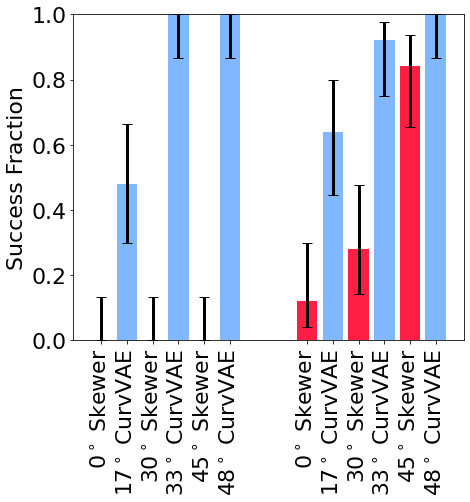

In [132]:
plt.figure(figsize=(7,6))
plt.bar(xs,ys,yerr=yerrs,tick_label=tick_labs,color=colors,capsize=5,error_kw={"linewidth":3},width=1.6)
plt.xticks(rotation = 90)
plt.ylabel("Success Fraction")
plt.ylim(0,1)
plt.savefig("images/successResultBarChart.png",bbox_inches="tight")